In [8]:
import numpy as np
import json
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the data

NOTE: The data has to be downloaded separately.

In [1]:
fold_tweets = json.load(open('data/fold_tweets.json', 'r'))
tweet_codes = json.load(open('data/tweet_codes.json', 'r'))
tweet_authors = json.load(open('data/tweet_authors.json', 'r'))
author_folds = json.load(open('data/author_folds.json', 'r'))
print(len(tweet_codes))

1851


In [4]:
codes = ['aggression', 'loss', 'substance'] # sequence of codes in annotations

## Computing annotation statistics

In [9]:
code_numbers = {}
for ix,code in enumerate(codes):
    print(code)
    numbers = [np.sum([v[ix] for v in vals],axis=0)*1./len(vals) for vals in tweet_codes.values()
               if np.sum([v[ix] for v in vals],axis=0)>0]
    code_numbers[code] = numbers
    print(Counter(numbers))

aggression
Counter({0.25: 196, 0.5: 93, 0.2: 49, 0.6: 46, 0.8: 30, 0.4: 27, 1.0: 16})
loss
Counter({1.0: 161, 0.75: 73, 0.25: 43, 0.6: 32, 0.8: 29, 0.2: 25, 0.4: 21, 0.5: 13})
substance
Counter({1.0: 142, 0.6: 46, 0.4: 43, 0.8: 33, 0.2: 30, 0.75: 27, 0.25: 24, 0.5: 20})


In [10]:

threshold = .49
# if more than this proportion of annotators for a tweet voted for a code, the tweet is considered as having the code
for code in codes:
    print(code)
    print(np.sum(np.array(code_numbers[code])>threshold))


aggression
185
loss
308
substance
268


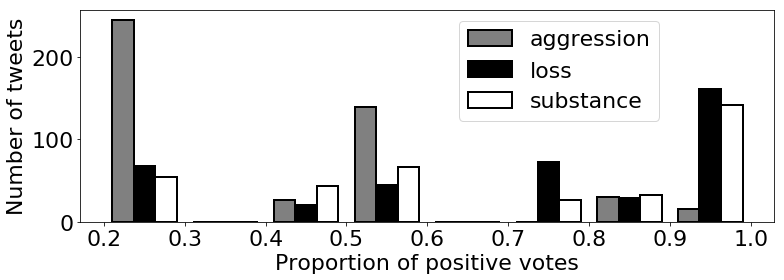

In [11]:

#plt.figure(figsize=(12,6))
fontsize = 22 #20
plt.figure(figsize=(11,4))
plt.rc('ytick', labelsize=fontsize) 
plt.rc('xtick', labelsize=fontsize) 

# the histogram of the data
n, bins, patches = plt.hist([code_numbers[code] for code in codes], 8, label=codes, edgecolor='black',
                           color=['grey', 'black', 'white'], linewidth=2)

plt.xlabel('Proportion of positive votes', fontsize=fontsize)
plt.ylabel('Number of tweets', fontsize=fontsize)
#plt.title(r'Annotator Consensus')

plt.legend(fontsize=fontsize, bbox_to_anchor=(0.85, 1))

plt.tight_layout()
#plt.savefig('annotator_consensus.pdf')
plt.show()